In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [300]:
names = [
    'rank', 'name', 'revenues', 'revenue_percent_change', 'profits' ,'profits_percent_change', 'assets', 'market_value', 'change_in_rank', 'employees'
]

data = pd.read_csv('datasets/Fortune 1000 Companies by Revenue.csv',
   names=names, low_memory=False, header=0)

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   rank                    1000 non-null   object
 1   name                    1000 non-null   object
 2   revenues                1000 non-null   object
 3   revenue_percent_change  1000 non-null   object
 4   profits                 1000 non-null   object
 5   profits_percent_change  1000 non-null   object
 6   assets                  1000 non-null   object
 7   market_value            1000 non-null   object
 8   change_in_rank          1000 non-null   object
 9   employees               1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"
5,6,Exxon Mobil,"$285,640",57.40%,"$23,040",-,"$338,923","$349,652.40",4,"63,000"
6,7,Berkshire Hathaway,"$276,094",12.50%,"$89,795",111.20%,"$958,784","$779,542.30",-1,"372,000"
7,8,Alphabet,"$257,637",41.20%,"$76,033",88.80%,"$359,268","$1,842,326.10",1,"156,500"
8,9,McKesson,"$238,228",3.10%,"($4,539)",-604.30%,"$65,015","$45,857.80",-2,"67,500"
9,10,AmerisourceBergen,"$213,988.80",12.70%,"$1,539.90",-,"$57,337.80","$32,355.70",-2,"40,000"


In [258]:
# Drop a column
data.drop(["change_in_rank"], axis = 'columns', inplace = True)
data.head()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795","2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30","1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60","154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20","258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30","350,000"


In [305]:
# Transform numeric values

def to_numeric(raw):
    if (type(raw)) == str:
        return pd.to_numeric(raw.replace(',', '').replace('$', ''), errors='coerce')
    else:
        return pd.to_numeric(raw);

data_transformations = {
    'rank': to_numeric,
    'name': str,
    'revenues': to_numeric,
    'employees': to_numeric,
}


parsed = data.transform(data_transformations)

parsed.head(10)

,rank,name,revenues,employees
0,1,Walmart,572754.0,2300000.0
1,2,Amazon,469822.0,1608000.0
2,3,Apple,365817.0,154000.0
3,4,CVS Health,292111.0,258000.0
4,5,UnitedHealth Group,287597.0,350000.0
5,6,Exxon Mobil,285640.0,63000.0
6,7,Berkshire Hathaway,276094.0,372000.0
7,8,Alphabet,257637.0,156500.0
8,9,McKesson,238228.0,67500.0
9,10,AmerisourceBergen,213988.8,40000.0


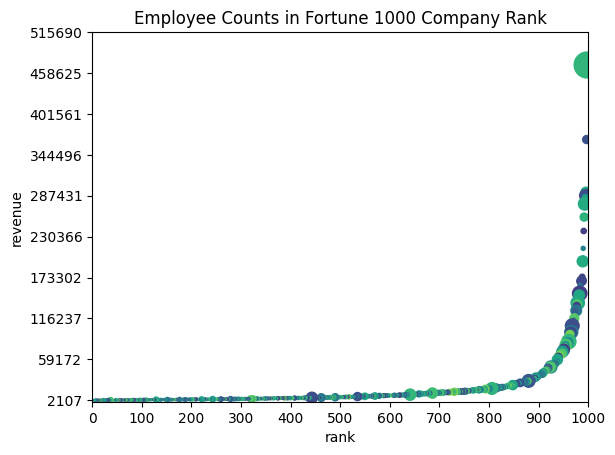

In [378]:
# x
def rank_plot_value(rank):
    return 1000 - rank
x = parsed["rank"].apply(rank_plot_value)

# y
y = parsed["revenues"]
max_y = parsed["revenues"].max() + 1
min_y = parsed["revenues"].min()
ticks_y = (max_y - min_y) / 10

# size and color
employees_max_count = parsed["employees"].max()
employees_max_plot_size = 500

def employees_plot_size(count):
    return count * employees_max_plot_size / employees_max_count

sizes = parsed["employees"].apply(employees_plot_size)
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(title='Employee Counts in Fortune 1000 Company Rank',
       xlabel='rank', xlim=(0, 8), xticks=np.arange(0, len(x)+1, len(x)/10),
       ylabel='revenue', ylim=(0, 8), yticks=np.arange(min_y, max_y, ticks_y))

plt.show()